In [5]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

 # 1.INTRODUCTION

# 1.1 Problem description

Drug consumption data analysis has been of great focus in recent years, due to the critical increase levels of drug consumption of licit and  illicit drugs. This increase  sometimes is  attributed to  the lack of  knowledge of drug consumption hazards, especially among adolescents. Analyzing  drug consumption data will enable us to identify the number of drugs consumed, the drugs that are consumed together, and the period of such consumption. Thus, it will open the doors for a better level of awareness and predictive models that will be of significant advantage in formulating proper treatment plans to reduce the drug consumption. Drug consumption data is usually composed of a set of patients features and a set of associated drugs. So, each patient might be using various drugs. For this reason, single label classification is not sufficient for capturing all trends and building an adequate  predictive model.\
In this paper, a drug consumption data set from a survey, containing records for 1885 respondents, about their attributes, which include the five-factor model traits, impulsivity, sensation seeking, and other demographic characteristics, and central nervous system psychoactive drugs consumption history (18 drugs) was analyzed and used to develop a predictive model. Personality traits are believed to have a strong relationship with drug consumption level.
This model was developed using multi-label classification. The targeted drugs classes (originally, seven classes) were transformed into two classes: user and nonuser.\
Our ultimate goal is to use this model for evaluating the future risk of a patient to be a drug consumer and what are the potentially used types of drug.

# 1.2 Dataset description

The following data are taken from Drug consumption (quantified) Data Set in http://archive.ics.uci.edu/ml/datasets. Database contains records for 1885 respondents.\
The attributes given are the following:
<ul>
<li><strong>ID</strong>: ID is number of record in original database. </li>
<li><strong>Age</strong>: Age is the age of participant and has one of the values (18-24, 25-34, 35-44, 45-54, 55-64, 65+)</li>
<li><strong>Gender</strong>: Gender is gender of participant (female, male)</li>
<li><strong>Education</strong>: Education is level of education of participant and has one of the values (Left School Before 16 years, Left school at 16 years, Left school at 17 years, Left school at 18 years, Some college or no certificate or degree, Professional certificate/ diploma, University degree, Master degree, Doctorate degree)</li>
<li><strong>Country</strong>: Country is country of current residence of participant and has one of the values (Australia, Canada,New Zealand, Other, Republic of Ireland, UK, USA)</li>
<li><strong>Ethnicity</strong>: Ethnicity is ethnicity of participant and has one of the values (Asian, Black, Mixed-Black/Asian, Mixed-White/Asian, Mixed-White/Black, Other, White)</li>
<li><strong>Nscore</strong>: Nscore is NEO-FFI-R Neuroticism. Neuroticism is one of the Big Five higher-order personality traits in the study of psychology. Individuals who score high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness.</li>
<li><strong>EScore</strong>: Escore (Real) is NEO-FFI-R Extraversion. Extraversion is one of the five personality traits of the Big Five personality theory. It indicates how outgoing and social a person is. A person who scores high in extraversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy.</li>
<li><strong>Oscore</strong>: Oscore (Real) is NEO-FFI-R Openness to experience. It indicates how open-minded a person is. A person with a high level of openness to experience in a personality test enjoys trying new things. They are imaginative, curious, and open-minded. Individuals who are low in openness to experience would rather not try new things. They are close-minded, literal and enjoy having a routine.</li>
<li><strong>Ascore</strong>: Ascore(Real) is NEO-FFI-R Agreeableness. A person with a high level of agreeableness in a personality test is usually warm, friendly, and tactful. They generally have an optimistic view of human nature and get along well with others.</li>
<li><strong>Cscore</strong>: Cscore (Real) is NEO-FFI-R Conscientiousness. A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously. Their methodic planning and perseverance usually makes them highly successful in their chosen occupation.</li>
<li><strong>Impulsive</strong>: Impulsive (Real) is Impulsiveness measured by BIS-11. In psychology, impulsivity (or impulsiveness) is a tendency to act on a whim, displaying behavior characterized by little or no forethought, reflection, or consideration of the consequences.</li>
<li><strong>SS</strong>: SS(Real) is Sensation Seeking measured by ImpSS. Sensation is input about the physical world obtained by our sensory receptors, and perception is the process by which the brain selects, organizes, and interprets these sensations.</li>

Moreover there are 18 legal and illegal drugs: <strong>alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron)</strong>. There are seven possible classes that the respondents answers for each drug might belong to. The classes are never used (CL0), used over a decade ago (CL1), used in last decade (CL2), used in last year (CL3), used in last month (CL4), used in last week (CL5), and used in last day (CL6). 


In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np#, float
import seaborn as sn
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import chart_studio.plotly as py
from chart_studio.plotly import iplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.formula.api import ols

from sklearn import datasets, linear_model, metrics, svm
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, mean_squared_error, r2_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_recall_curve
from sklearn.metrics import classification_report, auc,precision_score,recall_score, f1_score
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV,  train_test_split, KFold,  learning_curve, ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler,scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits


import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import  Pipeline#, make_pipeline

from scipy.cluster import hierarchy as hc
from scipy.stats import norm

SEED=5
colors = plotly.colors.DEFAULT_PLOTLY_COLORS


We read the csv file containing our data, we store them in a local dataframe and we extrapolate its main characteristics:

In [3]:
# load the dataset
df = pd.read_csv(r'~/Desktop/POLITO/data spaces/drug_consumption_2.csv')
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 1885 rows and 32 columns.


In [4]:
# check for null values in the dataset
print("There are " + ("some" if df.isnull().values.any() else "no")  + " null/missing values in the dataset.")

There are no null/missing values in the dataset.


An example of the structure is given below:

In [5]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


The data does not contain any missing values. Let's check the form of our variables:

In [6]:
df.dtypes

ID             int64
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

We need to preprocess our data in order to transform our classes into two classes (users and nonusers). 

# 1.3 Preprocessing

In our study, the classes from Alcohol to VSA are transformed into two classes: nonusers(0) and users(1). The categories of CL0, CL1 and CL2 are merged to form the nonuser class, and the other categories were placed into the user class.

In [7]:
def pre_df(df):   
    df= [s.replace("CL0", "0") for s in df]
    df= [s.replace("CL1", "0") for s in df]
    df= [s.replace("CL2", "0") for s in df]
    df= [s.replace("CL3", "1") for s in df]
    df= [s.replace("CL4", "1") for s in df]
    df= [s.replace("CL5", "1") for s in df]
    df= [s.replace("CL6", "1") for s in df]
    return df


In [8]:
df.Cannabis=pre_df(df.Cannabis)
df.Alcohol=pre_df(df.Alcohol)
df.Amphet=pre_df(df.Amphet)
df.Coke=pre_df(df.Coke)
df.Ecstasy=pre_df(df.Ecstasy)
df.VSA=pre_df(df.VSA)
df.Heroin=pre_df(df.Heroin)
df.Caff=pre_df(df.Caff)
df.Choc=pre_df(df.Choc)
df.Nicotine=pre_df(df.Nicotine)
df.Amyl=pre_df(df.Amyl)
df.Legalh=pre_df(df.Legalh)
df.Benzos=pre_df(df.Benzos)
df.Crack=pre_df(df.Crack)
df.Ketamine=pre_df(df.Ketamine)
df.Legalh=pre_df(df.Legalh)
df.LSD=pre_df(df.LSD)
df.Meth=pre_df(df.Meth)
df.Mushrooms=pre_df(df.Mushrooms)
df.Semer=pre_df(df.Semer)

We want to see the frequency of users for each addictive substance in order to remove the drugs that are not relavant.

In [9]:
def percent(df):  
    #perc = df.sum() * 100 / df.shape[0]
    user = df[df=='1'].count()
    perc = user *100 / df.count()
    return perc

In [10]:
print("Alcohol consumer percentage is %.3f%%." % percent(df.Alcohol))
print("Amphet consumer percentage is %.3f%%." % percent(df.Amphet))
print("Amyl consumer percentage is %.3f%%." % percent(df.Amyl))
print("Benzos consumer percentage is %.3f%%." % percent(df.Benzos))
print("Caff consumer percentage is %.3f%%." % percent(df.Caff))
print("Cannabis consumer percentage is %.3f%%." % percent(df.Cannabis))
print("Choc consumer percentage is %.3f%%." % percent(df.Choc))
print("Coke consumer percentage is %.3f%%." % percent(df.Coke))
print("Crack consumer percentage is %.3f%%." % percent(df.Crack))
print("Ecstasy consumer percentage is %.3f%%." % percent(df.Ecstasy))
print("Heroin consumer percentage is %.3f%%." % percent(df.Heroin))
print("Ketamine consumer percentage is %.3f%%." % percent(df.Ketamine))
print("Legalh consumer percentage is %.3f%%." % percent(df.Legalh))
print("LSD consumer percentage is %.3f%%." % percent(df.LSD))
print("Meth consumer percentage is %.3f%%." % percent(df.Meth))
print("Mushrooms consumer percentage is %.3f%%." % percent(df.Mushrooms))
print("Nicotine consumer percentage is %.3f%%." % percent(df.Nicotine))
print("Semer consumer percentage is %.3f%%." % percent(df.Semer))
print("VSA consumer percentage is %.3f%%." % percent(df.VSA))

Alcohol consumer percentage is 92.785%.
Amphet consumer percentage is 23.130%.
Amyl consumer percentage is 7.056%.
Benzos consumer percentage is 28.382%.
Caff consumer percentage is 96.764%.
Cannabis consumer percentage is 52.997%.
Choc consumer percentage is 97.613%.
Coke consumer percentage is 22.122%.
Crack consumer percentage is 4.191%.
Ecstasy consumer percentage is 27.427%.
Heroin consumer percentage is 6.260%.
Ketamine consumer percentage is 11.034%.
Legalh consumer percentage is 29.920%.
LSD consumer percentage is 20.159%.
Meth consumer percentage is 16.976%.
Mushrooms consumer percentage is 23.024%.
Nicotine consumer percentage is 56.233%.
Semer consumer percentage is 0.159%.
VSA consumer percentage is 5.040%.


Now we can remove the variables whose percentage of users is less than 20%.\
Moreover the "Id" column is deleted because it cannot be related to participant. 

In [11]:
df=df.drop(columns=['ID','Amyl','Crack','Heroin','Ketamine','Meth','Semer','VSA'])  

We want to convert the arguments to a numeric type in order to do a binary classification.

In [12]:
df.Choc=pd.to_numeric(df.Choc, errors='coerce')
df.Alcohol=pd.to_numeric(df.Alcohol, errors='coerce')
df.Caff=pd.to_numeric(df.Caff, errors='coerce')
df.Coke=pd.to_numeric(df.Coke, errors='coerce')
df.Ecstasy=pd.to_numeric(df.Ecstasy, errors='coerce')
df.Cannabis=pd.to_numeric(df.Cannabis, errors='coerce')
df.Legalh=pd.to_numeric(df.Legalh, errors='coerce')
df.Nicotine=pd.to_numeric(df.Nicotine, errors='coerce')
df.Benzos=pd.to_numeric(df.Benzos, errors='coerce')
df.Amphet=pd.to_numeric(df.Amphet, errors='coerce')
df.LSD=pd.to_numeric(df.LSD, errors='coerce')
df.Mushrooms=pd.to_numeric(df.Mushrooms, errors='coerce')

In [13]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Benzos,Caff,Cannabis,Choc,Coke,Ecstasy,Legalh,LSD,Mushrooms,Nicotine
0,35-44,female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,1,0,1,0,0,0,0,0,0
1,25-34,male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,1,1,1,1,1,0,0,0,1
2,35-44,male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,1,1,1,0,0,0,0,0,0
3,18-24,female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,1,1,0,1,0,0,0,0,0,0
4,35-44,female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,1,1,0,0,0,0,0,0


In [14]:
df.dtypes

Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol        int64
Amphet         int64
Benzos         int64
Caff           int64
Cannabis       int64
Choc           int64
Coke           int64
Ecstasy        int64
Legalh         int64
LSD            int64
Mushrooms      int64
Nicotine       int64
dtype: object

Statistical overview of the data

The following statistical measures can be seen for each column using the describe-function of DataFrame of the pandas library:
<ul>
<li><strong>count</strong>: number of samples</li>
<li><strong>mean</strong>: the mean of this attribute among all samples</li>
<li><strong>std</strong>: the standard deviation of this attribute</li>
<li><strong>min</strong>: the minimal value of this attribute</li>
<li><strong>25%</strong>: the lower percentile</li>
<li><strong>50%</strong>: the median</li>
<li><strong>75%</strong>: the upper percentile</li>
<li><strong>max</strong>: the maximal value of this attribute</li>

In [15]:
df.describe()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Benzos,Caff,Cannabis,Choc,Coke,Ecstasy,Legalh,LSD,Mushrooms,Nicotine
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,0.927851,0.231300,0.28382,0.967639,0.529973,0.976127,0.221220,0.274271,0.299204,0.201592,0.230239,0.562334
std,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,0.258802,0.421775,0.45097,0.177003,0.499233,0.152693,0.415179,0.446264,0.458031,0.401295,0.421097,0.496231
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,1.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The psycological factors, the impulsivity and the sensation seeking are given standardized.

These numbers are hard to interpret in this format.



In [16]:
sub_df=df[["Nscore", "Escore","Oscore","Ascore","Cscore","Impulsive","SS"]]

In [17]:
sub2_df=df[['Alcohol','Amphet', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Ecstasy',
       'Legalh', 'LSD', 'Mushrooms', 'Nicotine']]

# 2 DATA ANALYSIS

First of all we look at the distribution of the our target variable:

In [18]:
data=[go.Bar(x=df["Cannabis"].value_counts().index,
            y=df["Cannabis"].value_counts().values)]
layout = go.Layout(
    autosize=False,
    width=500,
    height=400,
    xaxis=dict(
        title='Cannabis'),
    yaxis=dict(
        title='#samples'
    ))

fig = go.Figure(data=data, layout=layout)
fig

In [19]:
cannabis_perc = df["Cannabis"].sum() * 100 / df["Cannabis"].shape[0]
print("Cannabis percentage is %.3f%%." % cannabis_perc)

Cannabis percentage is 52.997%.


# 2.1 Risk factor

We start now with the analysis of risk factors. We would like to see if there exist some relationship between the use of cannabis and the others attributes.\
First of all we consider the age of our partecipant.

In [20]:
data=[go.Bar(x=df["Age"].value_counts().index,
            y=df["Age"].value_counts().values)]
layout = go.Layout(
    autosize=False,
    width=500,
    height=400,
    xaxis=dict(
        title='Age range'),
    yaxis=dict(
        title='#samples'
    ))

fig = go.Figure(data=data, layout=layout)
fig

We can see that the number of partecipants isn't the same for each age range. So now we want to observe, for each age range, how many people are users.

In [21]:
age_cannabis_df = df.groupby(["Age", "Cannabis"]).size().unstack()
print(age_cannabis_df)

Cannabis    0    1
Age               
18-24     107  536
25-34     243  238
35-44     233  123
45-54     219   75
55-64      67   26
65+        17    1


Now we plot these results in the histogram below.

In [22]:
fig1=go.Figure(data=[
    go.Bar( x=age_cannabis_df.index, y=age_cannabis_df[0]),
    go.Bar( x=age_cannabis_df.index, y=age_cannabis_df[1])])
fig1.show()

The proportion of cannabis users decreases with increasing age range. In fact, the sample taken in the age range '18-24' is mainly composed by consumers, in contrast with all the others age ranges, where the number of non users is greater than the number of users.

We can analyze the relationship between the sex of the people and their consume of cannabis in the same way.

In [23]:
data=[go.Bar(x=df["Gender"].value_counts().index,
            y=df["Gender"].value_counts().values)]
layout = go.Layout(
    autosize=False,
    width=500,
    height=400,
    xaxis=dict(
        title='Gender'),
    yaxis=dict(
        title='#samples'
    ))

fig = go.Figure(data=data, layout=layout)
fig

The total number of women and men is almost the same. But we could observe below what is the distribution of users distinctly for each sex.

In [24]:
gender_cannabis_df = df.groupby(["Gender", "Cannabis"]).size().unstack()
print(gender_cannabis_df)

Cannabis    0    1
Gender            
female    578  364
male      308  635


In [25]:
fig2=go.Figure(data=[
    go.Bar( x=gender_cannabis_df.index, y=gender_cannabis_df[0]),
    go.Bar( x=gender_cannabis_df.index, y=gender_cannabis_df[1])])

fig2.show()

From the study made on sex vs target we underline that the use is more frequent in men than in women.
This shows that we should incorporate the gender into our further analysis, because it could be help to predict if a partecipant is a user of cannabis.

Next, we look at the cannabis distribution per level of education, to see how much the education influences our target:

In [26]:
education_cannabis_df = df.groupby(["Education", "Cannabis"]).size().unstack()#.sort_values(ascending=False)
print(education_cannabis_df)

Cannabis                                              0    1
Education                                                   
Doctorate degree                                     58   31
Left school at 16 years                              55   44
Left school at 17 years                              10   20
Left school at 18 years                              31   69
Left school before 16 years                          10   18
Masters degree                                      196   87
Professional certificate/ diploma                   152  118
Some college or university no certificate or de...   98  408
University degree                                   276  204


In [27]:
fig3=go.Figure(data=[
    go.Bar( x=education_cannabis_df.index, y=education_cannabis_df[0]),
    go.Bar( x=education_cannabis_df.index, y=education_cannabis_df[1])])

fig3.show()

From the histogram we have just shown, we couldn't really understand the relationship between the level of education and the use of the drug. We could think that if a person hasn't got ah high level of education is mainly predisposed to be a consumer, but this is not true. In fact the highest proportion of users is given by the sample of people who went to the college but they don't complete the studies. 

Next, we look at the cannabis distribution per country, to see how much the state influences our target:

In [28]:
data=[go.Bar(x=df["Country"].value_counts().index,
            y=df["Country"].value_counts().values)]
layout = go.Layout(
    autosize=False,
    width=500,
    height=400,
    xaxis=dict(
        title='Country'),
    yaxis=dict(
        title='#samples'
    ))

fig = go.Figure(data=data, layout=layout)
fig

The majority of people considered in our analysis come from UK and USA: more than 1600 samples on a total of 1885 persons. This could be a problem: we couldn't understand the behaviours of the people in a specific country due to the low number of samples who has that specific origin.

In [29]:
country_cannabis_df = df.groupby(["Country", "Cannabis"]).size().unstack()
print(country_cannabis_df)

Cannabis               0    1
Country                      
Australia             11   43
Canada                32   55
New Zealand            1    4
Other                 31   87
Republic of Ireland    5   15
UK                   737  307
USA                   69  488


In [30]:
fig4=go.Figure(data=[
    go.Bar( x=country_cannabis_df.index, y=country_cannabis_df[0]),
    go.Bar( x=country_cannabis_df.index, y=country_cannabis_df[1])])

fig4.show()

For all the countries, except for the UK, there are more cannabis users than cannabis non users. 
It's really impressive how the number of users in UK is low: less than 1/3 of the sample taken in UK is a cannabis user.

Let's see the relationship between the ethnicity of a person and his inclination to be or not to be a cannabis user.

In [31]:
data=[go.Bar(x=df["Ethnicity"].value_counts().index,
            y=df["Ethnicity"].value_counts().values)]
layout = go.Layout(
    autosize=False,
    width=500,
    height=400,
    xaxis=dict(
        title='Ethnicity'),
    yaxis=dict(
        title='#samples'
    ))

fig = go.Figure(data=data, layout=layout)
fig

In [32]:
ethnicity_cannabis_df = df.groupby(["Ethnicity", "Cannabis"]).size().unstack()
print(ethnicity_cannabis_df)

Cannabis               0      1
Ethnicity                      
Asian               22.0    4.0
Black               25.0    8.0
Mixed-Black/Asian    NaN    3.0
Mixed-White/Asian    8.0   12.0
Mixed-White/Black   11.0    9.0
Other               17.0   46.0
White              803.0  917.0


In [33]:
fig4=go.Figure(data=[
    go.Bar( x=ethnicity_cannabis_df.index, y=ethnicity_cannabis_df[0]),
    go.Bar( x=ethnicity_cannabis_df.index, y=ethnicity_cannabis_df[1])])

fig4.show()

The majority of the samples in our dataset belongs to the white ethnicity.\
We are not going to consider in our analysis the ethnicity factor due to the imbalance of white people.


The following interactive graph shows the distribution of each psycological feature for cannabis user or cannabis non user.\
The slider can be used to switch between the different features.

In [34]:
level_0_df = df[df["Cannabis"] == 0]
level_1_df= df[df["Cannabis"] == 1]

In [35]:
def create_level_0_hist(col, visible=False):   
    return go.Histogram(
        x=level_0_df[col],
        name='level_0',
        visible=visible,
    )

def create_level_1_hist(col, visible=False):
    return go.Histogram(
        x=level_1_df[col],
        name='level_1',
        visible = visible,
    )

In [36]:
features = [x for x in sub_df.columns if x != 'Cannabis']
active_idx = 0
traces_level_0= [(create_level_0_hist(col) if i != active_idx else create_level_0_hist(col, visible=True)) 
                 for i, col in enumerate(features)]
traces_level_1= [(create_level_1_hist(col) if i != active_idx else create_level_1_hist(col, visible=True))
                 for i, col in enumerate(features)]


data =traces_level_0 + traces_level_1 

n_features = len(features)
steps = []

for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = features[i],
    )
    step['args'][1][i] = True 
    step['args'][1][i + n_features] = True 
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
)

fig = go.Figure(data=data, layout=layout)
fig





We can clearly see that the person with a higher value of Oscore is more likely a cannabis user. In fact Oscore is 'openness to experience' that means that a person with a high level of openness to experience in a personality test enjoys trying new things.\
Also high level of impulsiveness involves a highest probability of use of cannabis.
One interesting graph is of the feature "SS" (Sensation seeking): the higher our senses are, the more predisposed we are to be consumer.\
Interestingly, this does not apply to Nscore where individuals who scores high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, fear, anger, frustration, jealousy, guilt, depressed mood, and loneliness.\
Instead an high level of Cscore implies most likely that the partecipant is not a cannabis user because the conscientiousness usually is releted to self-discipline.\
From these graphs it seems that the levels of Nscore, Escore and Ascore are not influent.

Next, we take a look at the box plots for each feature. A box plot visualizes the following statistics:
<ul>
<li>the <strong>median</strong></li>
<li>the <strong>first quartile (Q1)</strong> and the <strong>third quartile (Q3)</strong> building the interquartile range (IQR)</li>
<li>the <strong>lower fence (Q1 - 1.5 IQR)</strong> and the <strong>upper fence (Q3 + 1.5 IQR)</strong></li>
    <li>the <strong>maximum</strong> and the <strong>minimum</strong> value</li>
</ul>
We obtain the same results from the boxplots below.

In [37]:
def create_level_0_trace(col, visible=False):   
    return go.Box(
        y=level_0_df[col],
        name='level_0',
        visible=visible,
    )

def create_level_1_trace(col, visible=False):
    return go.Box(
        y=level_1_df[col],
        name='level_1',
        visible = visible,
    )


In [38]:
features = [x for x in sub_df.columns]
active_idx = 0
traces_level_0= [(create_level_0_trace(col) if i != active_idx else create_level_0_trace(col, visible=True)) 
                 for i, col in enumerate(features)]
traces_level_1 = [(create_level_1_trace(col) if i != active_idx else create_level_1_trace(col, visible=True)) 
                  for i, col in enumerate(features)]


data = traces_level_0 + traces_level_1 

n_features = len(features)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = features[i],
    )
    step['args'][1][i] = True 
    step['args'][1][i + n_features] = True
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
)

fig = go.Figure(data=data, layout=layout)
fig

Now we observe how some personality traits, the impulsivity and the sensation seeking influece the samples of partecipant for each level of education.\
We are going to understand if there is a factor in people who goes to the college or university but who doesn't have the degree which causes the elevate use of cannabis.

In [39]:
df_by_Education=df.iloc[df.sort_values(by='Education').index , :]
px.box(df, x=df_by_Education.Education, y=df.Oscore, color=df.Cannabis)

There isn't a correlation between the openness of experience and the level of education. Instead there is a positive correlation between the openness of experience and the use of cannabis.

We can observe some interesting thing:\
-consider a person who left school before 16 years but who doesn't use cannabis. He statistically has a Cscore's median higher that other people, so it means that he is self deciplinate.\
-consider a person who has a doctorate degree but who use cannabis. He has a Cscore's median lower that other people.

In [40]:
px.box(df, x=df_by_Education.Education, y=df.Impulsive, color=df.Cannabis)

We can conclude that there is not a relationship between the level of education and the level of different personality traits.

We are going to understand if there is a factor in UK people which make sure that there is such a disproportion between non users and users.\
We see that belonging to a distinctive country isn't a factor that influences the use of cannabis.

In [41]:
px.box(df, x=df.Country, y=df.Impulsive, color=df.Cannabis)

In [42]:
px.box(df, x=df.Country, y=df.Oscore, color=df.Cannabis)

It's also reasonable to think that the origin (country, ethnicity) or the education of a person don't influence the use of cannabis. As seen also in our previous analysis, the level of education, the origin and the ethnicity of the partecipant seem not to be so relevant overall.

In [43]:
features = [x for x in sub2_df.columns if x != 'Cannabis']
active_idx = 0
traces_level_0= [(create_level_0_hist(col) if i != active_idx else create_level_0_hist(col, visible=True)) 
                 for i, col in enumerate(features)]
traces_level_1= [(create_level_1_hist(col) if i != active_idx else create_level_1_hist(col, visible=True))
                 for i, col in enumerate(features)]


data =traces_level_0 + traces_level_1 

n_features = len(features)
steps = []

for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = features[i],
    )
    step['args'][1][i] = True 
    step['args'][1][i + n_features] = True 
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
)

fig = go.Figure(data=data, layout=layout)
fig


As we could imagine the consume of legal drugs like alcohol, coffee and chocolate is irrelevant in the analysis of cannabis consumption.\
Instead, if a person is a user of amphetamines/ benzodiazepine/ cokaine/ ecstacy/ legal highs or nicotine more likely this person is a cannabis user.

A possible way to compute correlation is using the Pearson correlation, which solves the problem of normalization.

Now we consider only the numerical variables.

In [44]:
df_drop=df.drop(columns=['Age', 'Gender', 'Education', 'Country', 'Ethnicity'])

In order to investigate the pair-wise correlations between two variables $X$ and $Y$, we use the Pearson correlation.\
Let $σ_X$,$σ_Y$ be the standard deviation of $X$,$Y$ and $cov(X,Y)=E[(X−E[X])(Y−E[Y])]$. Then we can define the Pearson correlation as the following:
>$ρ_{(X,Y)}=\frac{cov(X,Y)}{σ_Xσ_Y}$

To visualize these correlations we use a heatmap plot, in which high correlations are coloured more to the blue and lower ones more to the ice light blue.

In [45]:
corr = df_drop.corr()
colorscale=[[0, '#edf8fb'], [0.3, '#b3cde3'], [0.6, '#8856a7'], [1, '#810f7c']]
trace = go.Heatmap(z=corr.values.tolist(), x=corr.columns, y=corr.columns, colorscale=colorscale)
data=[trace]
layout = go.Layout(
    title='Heatmap of pairwise correlation of the columns',
    autosize=False,
    width=850,
    height=700,
    yaxis=go.layout.YAxis(automargin=True),
    xaxis=dict(tickangle=40),
    margin=go.layout.Margin(l=0, r=200, b=200, t=80)
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap1')

We can see a high correlation between all the drugs except for caffeine, chocolate and alcohol. Probably, the tendency to use an illegal drug is correlated to the use of an other drug.\
The use of cannabis is highly correlated with all the illegal drugs but in particular it's very linked to the use of legal highs, mushrooms, LSD and ecstasy. The psycological factors that influece mostly the use of cannabis are the sensation seeking with a correlation of 0.44 and the openness to experience with 0.39, as well as the impulsiveness. How seen previously, we can observe that the use of cannabis has a negative correlation with the level of conscientiousness, -0.27.\
Instead caffeine, chocolate and alcohol have got a low correlation with each attribute. It makes sense that these last substances haven't a relationship with the use of the others drugs. \
Nicotine and legal highs are partially correlated with the use of cannabis, with both correlation equal to 0.52. Also mushrooms and ecstasy are highly correlated with cannabis. \
The sensation seeking and the impulsiveness are positively correleted each other, whereas the neuroticism and the extraversion, which indicates how outgoing and social a person is, are negatively correleted each other.


We would like to reduce the dimensionality of our dataset we can identify and remove duplicate features according to their pairwise correlation with others. For this, we conduct a clustering of the features using agglomerative hierarchical clustering with average linkage.\
This method starts by creating one cluster for each feature and by computing the pairwise distance/dissimilarity/similarity between all the clusters, which in our case is the correlation. Then it select the two clusters with the highest average correlation to be merged. In the next iteration, the next pair of clusters is selected to be merged. This process is repeated until we end up with one cluster.


# 3 ASSOCIATION RULES

Now we analyze the links between the use of different drugs.

Association rules allow us to assess what drugs are being used together. To analyze association rules, a subset of just the drug variables are seperated from the clean dataset. Alcohol, chocolate and caffeine were removed as those are commonly consumed items. Several drug associations are evident in the graphs and charts.

Association rules are created by searching data for frequent if-then patterns and using the criteria support and confidence to identify the most important relationships. 

In [47]:
df_cat=sub2_df.drop(columns=['Choc','Alcohol','Caff'])
#print(sub2_df.head())
print(df_cat.head())

   Amphet  Benzos  Cannabis  Coke  Ecstasy  Legalh  LSD  Mushrooms  Nicotine
0       0       0         0     0        0       0    0          0         0
1       0       0         1     1        1       0    0          0         1
2       0       0         1     0        0       0    0          0         0
3       0       1         0     0        0       0    0          0         0
4       0       0         1     0        0       0    0          0         0


Apriori Algorithm is used to gain insight into the structured relationships between different items involved. 
The output is a data frame with the support for each itemsets.

The <strong>support</strong> is an indication of how frequently the items appear in the data.\
Thus the frequency in our dataset of amphetamine's users is around 0.23. The frequency of people who use amphetamine and cannabis together is 0.21.

In [48]:

from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(df_cat, min_support=0.2, use_colnames=True, verbose=1)
freq_items

Processing 42 combinations | Sampling itemset size 3


,support,itemsets
0,0.231300,(Amphet)
1,0.283820,(Benzos)
2,0.529973,(Cannabis)
3,0.221220,(Coke)
4,0.274271,(Ecstasy)
5,0.299204,(Legalh)
6,0.201592,(LSD)
7,0.230239,(Mushrooms)
8,0.562334,(Nicotine)
9,0.211141,"(Amphet, Cannabis)"


The <strong>confidence</strong> of an association rule is a percentage value that shows how frequently the rule head occurs among all the groups containing the rule body. The confidence value indicates how reliable this rule is.

The <strong>lift</strong> is the ratio of these values: target response divided by average response.
<ul>
<li>If the rule had a lift of 1, it would imply that the probability of occurrence of the antecedent and that of the consequent are independent of each other. When two events are independent of each other, no rule can be drawn involving those two events.</li>
<li>If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.</li>
<li>If the lift is < 1, that lets us know the items are substitute to each other. This means that presence of one item has negative effect on presence of other item and vice versa. </li>

In [49]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Mushrooms),(Cannabis),0.230239,0.529973,0.220690,0.958525,1.808629,0.098669,11.332862
16,"(Legalh, Nicotine)",(Cannabis),0.247215,0.529973,0.234483,0.948498,1.789708,0.103465,9.126348
12,"(Ecstasy, Nicotine)",(Cannabis),0.230239,0.529973,0.217507,0.944700,1.782543,0.095486,8.499646
4,(Legalh),(Cannabis),0.299204,0.529973,0.276393,0.923759,1.743028,0.117822,6.164999
3,(Ecstasy),(Cannabis),0.274271,0.529973,0.253050,0.922631,1.740900,0.107694,6.075093
0,(Amphet),(Cannabis),0.231300,0.529973,0.211141,0.912844,1.722433,0.088558,5.392936
11,"(Ecstasy, Cannabis)",(Nicotine),0.253050,0.562334,0.217507,0.859539,1.528519,0.075208,3.115919
15,"(Cannabis, Legalh)",(Nicotine),0.276393,0.562334,0.234483,0.848369,1.508655,0.079058,2.886378
9,(Ecstasy),(Nicotine),0.274271,0.562334,0.230239,0.839458,1.492810,0.076007,2.726183
10,(Legalh),(Nicotine),0.299204,0.562334,0.247215,0.826241,1.469306,0.078962,2.518811


For example, the rule $(Ecstasy, Nicotine)  -> (Cannabis)$ would indicate that if a person uses ecstasy and nicotine together, he is likely to also use cannabis. \
The frequency of all the three substance together is around to 0.22.
This rule has a confidence value equal to 0.944700, which means that 94.5% of the times a person is user of ecstasy and nicotine, cannabis is used as well.\
The lift is always  > 1, so there is an high association between the antecedents and the consequents in every single rule. In fact we have already observed an high correlation between the use of different drugs.\
Clearly the mainly consequents are the cannabis and the nicotine, the most accessible substances in the sub-dataset 'df_cat' analized.

# 4 CLASSIFICATION

We focus now our attention on the creation of a statistical model in order to be able to predict the qualitative value of the variable of interest “target”, based on the value of a set of predictors. This technique is commonly called classification because it involves assigning the observation to a category or class. When we build a classifier we have to define a set of training observations for the implementation of the model and a set of test observations used to deduce how good it is.

We are going to use some classifiers by which we can know the effect of particular drug in the people. In simple words, we can know how many people are addicted to a particular drug based on these classifications.


First of all, we introduce the Label Encoder class to convert this kind of categorical text data into model-understandable numerical data. LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. This approach is very simple and it involves converting each value in a column to a number. \
Label encoding induces a new problem since it uses number sequencing. The problem using the number is that they introduce relation/comparison between them. For example, apparently there is no relation between various level of education, but the algorithm might misunderstand that data has some kind of hierarchy/order 0 < 1 < 2 … < 6 and might give 6X more weight to ‘New Zealand’ in calculation then than ‘UK’.

In [50]:
df.Country.unique()


array(['UK', 'Canada', 'USA', 'Other', 'Australia', 'Republic of Ireland',
       'New Zealand'], dtype=object)

So we have to drop the variables which could have this kind of problem. 

In [51]:
df_drop2=df.drop(columns=[ 'Education', 'Country', 'Ethnicity'])
X = df_drop2.values

labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,1] = labelencoder_X.fit_transform(X[:,1])
X[:,2] = labelencoder_X.fit_transform(X[:,2])
X[:,3] = labelencoder_X.fit_transform(X[:,3])
X[:,4] = labelencoder_X.fit_transform(X[:,4])
X[:,5] = labelencoder_X.fit_transform(X[:,5])
X[:,6] = labelencoder_X.fit_transform(X[:,6])
X[:,7] = labelencoder_X.fit_transform(X[:,7])
X[:,8] = labelencoder_X.fit_transform(X[:,8])

X_df=pd.DataFrame(X,columns=['Age', 'Gender', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Ecstasy',
       'Legalh', 'LSD', 'Mushrooms', 'Nicotine'])


In [52]:
X_df

,Age,Gender,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,...,Benzos,Caff,Cannabis,Choc,Coke,Ecstasy,Legalh,LSD,Mushrooms,Nicotine
0,2,0,27,19,16,17,24,3,2,1,...,0,1,0,1,0,0,0,0,0,0
1,1,1,17,35,29,28,23,2,5,1,...,0,1,1,1,1,1,0,0,0,1
2,2,1,19,28,14,12,16,1,7,1,...,0,1,1,1,0,0,0,0,0,0
3,0,0,22,17,20,27,28,1,2,1,...,1,1,0,1,0,0,0,0,0,0
4,2,0,31,11,17,21,32,3,5,1,...,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,0,0,13,34,31,28,15,6,10,1,...,0,1,1,1,0,0,1,1,0,0
1881,0,1,21,34,24,28,12,6,8,1,...,0,1,1,1,0,0,1,1,1,1
1882,1,0,35,13,11,11,13,5,4,1,...,1,1,1,1,1,1,0,0,0,1
1883,0,0,33,9,22,12,4,7,9,1,...,0,1,1,1,0,1,1,1,1,1


Now we have an encoded dataset.

We define as 'labels' the values we want to predict. We remove the labels from the features

In [53]:
labels = np.array(df['Cannabis'])
# axis 1 refers to the columns
features= X_df.drop(columns=['Cannabis'], axis = 1)
# Saving feature names for later use
feature_list = list(X_df.columns)
# Convert to numpy array
features = np.array(features)

'train_test_split' is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. By default, Sklearn train_test_split will make random partitions for the two subsets. 

In [54]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, test_size = 0.2, random_state = SEED)

In [55]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1508, 20)
Training Labels Shape: (1508,)
Testing Features Shape: (377, 20)
Testing Labels Shape: (377,)


In [56]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [57]:
def print_results(test_labels, test_labels_pred):


    conf_mat = metrics.confusion_matrix(test_labels, test_labels_pred)

    TP = conf_mat[1, 1]
    TN = conf_mat[0, 0]
    FP = conf_mat[0, 1]
    FN = conf_mat[1, 0]

    #print(classification_report(test_labels, test_labels_pred))
    
    plot_confusion_matrix(cm           = conf_mat, 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")
    
    
    Type_I_error = (FP/len(test_labels))
    print("I type error is %.3f." % Type_I_error)
    Type_II_error = (FN/len(test_labels))
    print("II type error is %.3f." % Type_II_error)

In [58]:
def results(classifier, classifier_names, test_features,test_labels):
    recalls = []
    precision = []
    results_table = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"])
    for (i, clf), name in zip(enumerate(classifier), classifier_names):
        test_labels_pred = clf.predict(test_features)
        row = []
        row.append(accuracy_score(test_labels, test_labels_pred))
        row.append(precision_score(test_labels, test_labels_pred))
        row.append(recall_score(test_labels, test_labels_pred))
        row.append(f1_score(test_labels, test_labels_pred))
        row = ["%.3f" % r for r in row]
        results_table.loc[name] = row

    return results_table

In [59]:
def plot_roc_curve(classifiers, legend, title, X_test, y_test):
    trace1 = go.Scatter(
        x=[0, 1], 
        y=[0, 1], 
        showlegend=False,
        mode="lines",
        name="",
        line = dict(
            color = colors[0],
        ),
    )
    
    data = [trace1]
    aucs = []
    for clf, string, c in zip(classifiers, legend, colors[1:]):
        y_test_roc = np.array([([0, 1] if y else [1, 0]) for y in y_test])
        y_score = clf.predict_proba(X_test)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(2):
            fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        #aucs.append(roc_auc['micro'])

        trace = go.Scatter(
            x=fpr['micro'], 
            y=tpr['micro'], 
            showlegend=True,
            mode="lines",
            name=string + " (area = %0.3f)" % roc_auc['micro'],
            hoverlabel = dict(
                namelength=30
            ),
            line = dict(
                color = c,
            ),
        )
        data.append(trace)

    layout = go.Layout(
        title=title,
        autosize=False,
        width=550,
        height=550,
        yaxis=dict(
            title='True Positive Rate',
        ),
        xaxis=dict(
            title="False Positive Rate",
        ),
        legend=dict(
            x=0.4,
            y=0.06,
        ),
    )
    fig = go.Figure(data=data, layout=layout)
    return  iplot(fig, filename=title) #aucs,

In [60]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Test score")
    axes.legend(loc="best")

    # Plot n_samples vs fit_times
    #axes[1].grid()
    #axes[1].plot(train_sizes, fit_times_mean, 'o-')
    #axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
    #                     fit_times_mean + fit_times_std, alpha=0.1)
    #axes[1].set_xlabel("Training examples")
    #axes[1].set_ylabel("fit_times")
    #axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #axes[2].grid()
    #axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    #axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
    #                     test_scores_mean + test_scores_std, alpha=0.1)
    #axes[2].set_xlabel("fit_times")
    #axes[2].set_ylabel("Score")
    #axes[2].set_title("Performance of the model")

    return plt


In [61]:
def gridsearch_cv(clf, params, X_train, y_train, cv, smote=None):

    if smote is None:
        pipeline = Pipeline([('clf', clf)])
    else:
        pipeline = Pipeline([('sm', sm), ('clf', clf)])
        
    gs = GridSearchCV(pipeline, params, cv=kf, n_jobs=-1, scoring='f1', return_train_score=True)
    gs.fit(X_train, y_train)
    return gs

In [62]:
sm = SMOTE(random_state=SEED)
kf = StratifiedKFold(n_splits=5)
RANDOM_FOREST_PARAMS = {
    'clf__max_depth': [25, 50, 75],
    'clf__max_features': ["sqrt"], # just sqrt is used because values of log2 and sqrt are very similar for our number of features (10-19) 
    'clf__criterion': ['gini', 'entropy'],
    'clf__n_estimators': [100, 300, 500, 1000]
}

DECISION_TREE_PARAMS = {
    'clf__max_depth': [25, 50, 75],
    'clf__max_features': ["sqrt"], # just sqrt is used because values of log2 and sqrt are very similar for our number of features (10-19)
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [6, 10, 14],
}

LOGISTIC_REGRESSION_PARAMS = {
    'clf__solver': ['liblinear'],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2', 'l1']
}

KNN_PARAMS = {
    'clf__n_neighbors': [5, 15, 25, 35, 45, 55, 65],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2, 10]
}

SVM_PARAMS = [
{
    'clf__kernel': ['linear'],
    'clf__C': [0.1, 1, 10],
}, 
{
    'clf__kernel': ['rbf'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__gamma': [0.01, 0.1, 1, 10, 100],
}]
   

First of all we have to introduce the confusion matrix. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
In the context of confusion matrix, we have to name:
<ul>
<li><strong>True Positives (TP)</strong>: These are cases in which we predicted yes and are actually yes. In our case is when we predicted '1', the person is a user of cannabis, and is actually '1'.</li>
<li><strong>True Negatives (TN)</strong>: We predicted no, and no in actual. Here no stands for '0', so the tester is not a user and we predicted the same result.</li>
<li><strong>False Positives (FP)</strong>: We predicted yes (the person is a user), but actual is no (actually is not a user). (Type I error)</li>
<li><strong>False Negatives (FN)</strong>: We predicted no, yes in actual. (Type II error)</li>
</ul>

Now we can introduce several evalutation metric to compare the performance of the different classification model:

The most widely-used metric for model evaluation is the <strong>accuracy</strong>, defined as: $\frac{TP + TN}{TP + TN + FP + FN}$ .

The <strong>precision</strong> is the ratio $\frac{TP }{TP + FP}$. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The <strong>recall</strong> is the ratio $\frac{TP }{TP + FN}$. The recall is intuitively the ability of the classifier to find all the positive samples.

The <strong>f-β score</strong> can be interpreted as a weighted harmonic mean of the precision and recall, where an f-β score reaches its best value at 1 and worst score at 0. The f-β score weights the recall more than the precision by a factor of beta. If β = 1.0 means recall and precision are equally important. 


Hyper-parameter is a type of parameter for a machine learning model whose value is set before the model training process starts.\
Every classifier has a set of hyperparameters, which can be tuned by training the classifier with different values for these hyperparameters and selecting the classifier with the best score. There is still a risk of overfitting on the test set because we are using informations of the test data to select some training hyperparameters. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set. By partitioning the available data into three sets, we drastically reduce the number of samples. A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets.\
The following procedure is followed for each of the k “folds”:
<ul>
<li>we train our classifier on different unions of k-1 subsets and calculate its score on the subset which was not used for training;</li>
<li>the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy);</li>
<li>the final score is calculated by averaging the score of each iteration.</li>
</ul>
In our case the score is the f1-Score defined as $f_1 = 2×\frac{precision×recall}{precision+recall}$ .

To do this analysis, we use the sklearn.model_selection.GridSearchCV object, to which we pass a classifier, a dictionary of hyperparameters with values and a k-fold object. For a good trade-off between runtime and accuracy of the score we choose k=5. We will pick the best configuration of the parameter_grid for the model according to f1-Score and using a cross validation with k=5 partitions.


# 4.1 Logistic Regression

Logistic Regression is a classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts $p(Y=1)$ as a function of $X$.\
We know that the objective of our model is to predict the value of the response variable on the basis of the set of predictors $X$. If we have a binary qualitative response we use the model to define probabilities $p(X)$ and then, defining an appropriate threshold, we can compute the response variable. In case of linear regression it could happen that some of the estimates are out of the range $[0,1]$ making hard to interpret those values as probabilities. For this reason in case of binary response we use the logistic function

>$p(X)=\frac{\exp(β_0+β_1X) }{ 1+\exp(β_0+β_1X)}$

where the coefficients $β_0$ and $β_1$ are estimated using the maximum likelihood method on the training data. When we apply the model then we consider that

$Y=1$   if  $p(X) ≥ 0.5 $\
$Y=0$   otherwise

These concepts can ben easily generalized in case of multiple predictors as follows:

>$p(X)=\frac{\exp{(β_0+β_1X_1+⋯+β_pX_p)}}{1+\exp{(β_0+β_1X_1+⋯+β_pX_p)}}$

After this initial theoretical recall we apply the logistic regression on our dataset.

The hyperparameters of a logistic regression include the following ones, which can be passed to the LogisticRegression of sklearn.linear_model:
<ul>
<li>penalty: the norm used for penalization (default='l2')</li>
<li>C: the inverse of the regularization strength(default=1.0)</li>
<li>solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, (default=lbfgs)</li>
</ul>

In [63]:
lr_clf = gridsearch_cv(LogisticRegression(random_state=SEED), LOGISTIC_REGRESSION_PARAMS, train_features, train_labels, kf, smote=sm)

The best parameters configuration can be found with the attribute ' best_params_ ' of the gridsearch object.

In [64]:
print("Logistic Regression: " + str(lr_clf.best_params_))

Logistic Regression: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}


In [65]:
test_labels_pred = lr_clf.predict(test_features)

In [66]:
# save confusion matrix and slice into four pieces
conf_mat = metrics.confusion_matrix(test_labels, test_labels_pred)

TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]
TP,TN,FP,FN
print('True Positive = %i' % (TP))
print('True Negative = %i' % (TN))
print('False Positive = %i' % (FP))
print('False Negative = %i' % (FN))

True Positive = 178
True Negative = 145
False Positive = 16
False Negative = 38


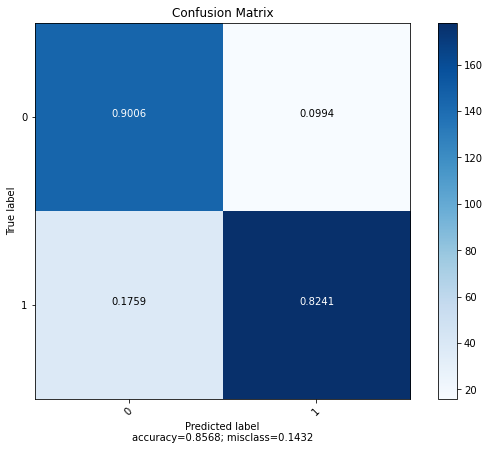

In [67]:
plot_confusion_matrix(cm           = conf_mat, 
                      normalize    = True,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

 In the output, 178 and 145 are actual predictions, and 16 and 38 are incorrect predictions.

The confusion matrix of the Logistic Regression shows that the probability to predict the correct class is with 0.90 and 0.86 similar for both classes. This means that the Logistic Regression has just a slight bias towards predicting a person as non user.\
It is important also to consider if there is a greater number of false negative or false positive occurrences. We remember that in our case 1 is associated to users people so false positive (pred:1, true:0 - I type error) means that users have been predicted as non users, while false negative (pred:0, true:1 - II type error) refers to users predicted as non users. Both the errors represent a problem for our model, but from our point of view false negative are more dangerous.

In [68]:
Type_I_error = (FP/len(test_labels))
print("I type error is %.3f" % Type_I_error)

I type error is 0.042


In [69]:
Type_II_error = (FN/len(test_labels))
print("II type error is %.3f." % Type_II_error)

II type error is 0.101.


Here we have the results of the metrics used by us for the Logistic Regression model.

In [70]:
classifier=[lr_clf]
classifier_name=['Logistic Regression']

In [71]:
results(classifier, classifier_name,test_features,test_labels)

,accuracy,precision,recall,f1
Logistic Regression,0.857,0.918,0.824,0.868


We obtain good values for this model; the precision is around 92%, which means that when it predicts a person to be a user, it is in 92% of the cases correct.

A learning curve shows the relationship of the training score versus the cross validated test score, in our case the f1-Score, for an estimator with a varying number of training samples. This visualization is typically used to show two things:
<ul>
<li>How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).</li>
<li>If the estimator is more sensitive to error due to variance vs. error due to bias.</li>
</ul>
The curves are plotted with the mean scores, however variability during cross-validation is shown with the shaded areas that represent a standard deviation above and below the mean for all cross-validations. If the model suffers from error due to bias, then there will likely be more variability around the training score curve. If the model suffers from error due to variance, then there will be more variability around the cross validated score.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

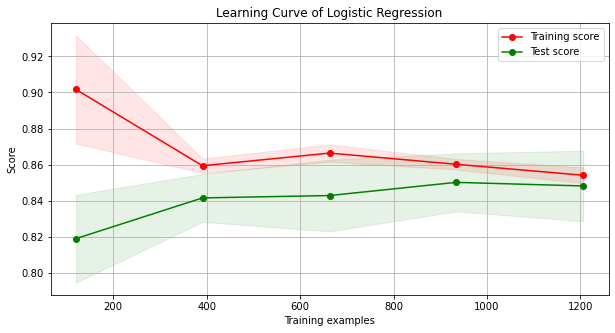

In [72]:
plot_learning_curve(lr_clf.best_estimator_, "Learning Curve of Logistic Regression", train_features, train_labels, cv=5)

The training score and the test score are almost the same at the end. However, the shape of the curve can be found in more complex datasets very often: the training score doesn't change a lot its value, instead the cross-validation score is low at the beginning and increases. Now we consider the gap as the difference between the training and validation error: the bigger the difference between the two scores, the bigger the gap. The bigger the gap, the bigger the variance. In our case, the gap is very narrow, so we can safely conclude that the variance is low.
The training and test scores converge together as more data is added, then the model will probably not benefit from more data.

Another way to compare our model with the others is the <strong>Area Under the Receiver Operating Characteristic curve (AUC)</strong>.\
We have to define the following two metrics:
<ul>
<li><strong>True positive rate (TPR)</strong>: this is the same as the recall: $FPR = recall = \frac{TP}{FN+TP}$</li>
<li><strong>False positive rate (FPR)</strong>: this corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points: $FPR = \frac{FP}{TN+FP}$</li>
</ul>

To plot the Receiver Operating Characteristic (ROC) curve we choose a number of different classification thresholds and compute the TPR and the FPR. So the curve shows the trade-off between these two. To combine the TPR and the FPR into one evaluation metric the area under the ROC curve (AUC) is computed.\
To evaluate our classifier, we're going to use an ROC Curve. ROC Curves are great for evaluating binary (0, 1) classification models.\
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate(Recall) against the false positive rate. It shows the tradeoff between sensitivity and specificity. A ROC Curve plots the False Positive Rate vs. the True Positive Rate for a classifier.

In [73]:
plot_roc_curve(classifier, classifier_name, "ROC curve", test_features, test_labels)


AUC score for the case is 0.929. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

# 4.2 SVM
The Support Vector Machine (SVM) is a supervised machine learning technique that classifies observations according to linear/non-linear decision boundaries. It is widely used in classification problems when data have exactly two classes, like in our case. It is a model that learns to differentiate between data in two categories based on past examples.
The simplest version is the SVC which considers a hyperplane that does not perfectly separate the two classes. This is also known as soft margin classifier because the margin can be violated by some of the training observations. We classify the test observation by determining on which side of the hyperplane it lies.
The SVM is a generalization of the previous classifier where the boundaries are non-linear. In this case we enlarge the feature space using polynomial kernels.\
A linear Support-Vector Machine (SVM) finds the optimal hyperplane between the points of two classes such that the distance of the nearest points to the decision boundary is maximized. This distance is called margin.

The hyperparameters of a SVM include the following ones, which can be passed to the SVC of sklearn.svm:
<ul>
<li>C: the inverse of the regularization strength (default=1.0)</li>
<li>kernel: the kernel used (default='rbf')</li>
</ul>

In [74]:
svm_clf = gridsearch_cv(svm.SVC(random_state=SEED, probability=True), SVM_PARAMS, train_features, train_labels, kf, smote=sm)
test_labels_pred = svm_clf.predict(test_features)

Here we have the best parameters:

In [75]:
print("SVM: " + str(svm_clf.best_params_))

SVM: {'clf__C': 0.1, 'clf__kernel': 'linear'}


In [76]:
classifier=[svm_clf]
classifier_name=['SVM']

In the following, the confusion matrix is shown:

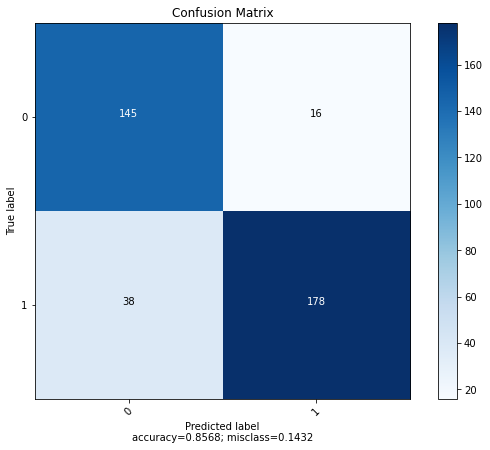

I type error is 0.042.
II type error is 0.101.


In [77]:
print_results(test_labels, test_labels_pred)

In [78]:
results(classifier, classifier_name,test_features,test_labels)

,accuracy,precision,recall,f1
SVM,0.857,0.918,0.824,0.868


All the considered metrics for the SVM model are just a little higher than the ones in the Logistic Regression.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

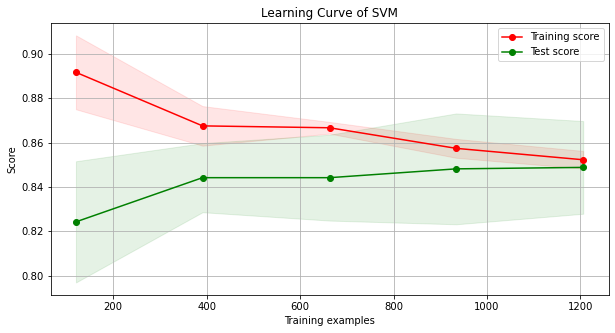

In [79]:
plot_learning_curve(svm_clf.best_estimator_, "Learning Curve of SVM", train_features, train_labels, cv=5)

For the learning curve of the SVM on the training set we can not see a clear trend, but on the test set the score increases with the number of training examples. Trained on all training samples the f1-score on the train set and on the test set is very similar, so the SVM is not overfitting the train data. The model will probably not benefit from more data.



In [80]:
plot_roc_curve(classifier, classifier_name, "ROC curve", test_features, test_labels)

# 4.3 Decision Tree

The decision tree is a classification algorithm that constructs a tree-like structure that can be used for choosing between various types of action. We developed the decision tree algorithm based on Gini gain which is a measure of
impurity. 

The hyperparameters of a Decision Tree include the following ones, which can be passed to the DecisionTreeClassifier of sklearn.tree:
<ul>
<li>criterion: the criterion which decides the feature and the value at the split (default='gini'). The Gini impurity measure is one of the methods used in decision tree algorithms to decide the optimal split from a root node, and subsequent splits. Gini Impurity tells us what is the probability of misclassifying an observation.</li>
<li>max_depth: the maximum depth of each tree (default=None)</li>
<li>min_samples_split: the minimum number of samples in a node to be considered for further splitting (default=2)</li>

In [81]:
tree_clf = gridsearch_cv(DecisionTreeClassifier(random_state=SEED), 
                        DECISION_TREE_PARAMS, train_features, train_labels, kf, smote=sm)
test_labels_pred = tree_clf.predict(test_features)

In [82]:
print("Decision Tree: " + str(tree_clf.best_params_))

Decision Tree: {'clf__criterion': 'entropy', 'clf__max_depth': 25, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 14}


In [83]:
classifier=[tree_clf]
classifier_name=['Decision Tree']

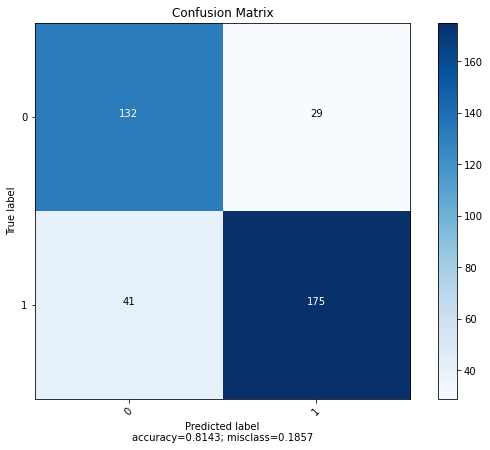

I type error is 0.077.
II type error is 0.109.


In [84]:
print_results(test_labels, test_labels_pred)

In [85]:
results(classifier, classifier_name,test_features,test_labels)

,accuracy,precision,recall,f1
Decision Tree,0.814,0.858,0.810,0.833


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

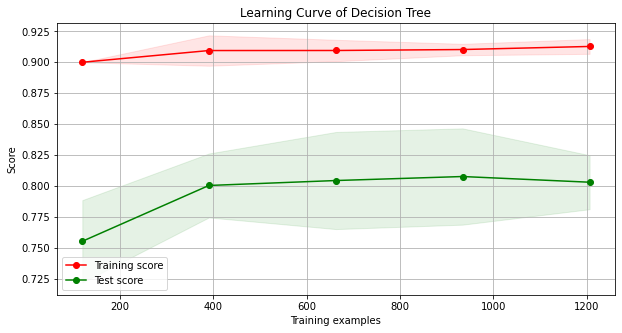

In [86]:
plot_learning_curve(tree_clf.best_estimator_, "Learning Curve of Decision Tree", train_features, train_labels, cv=5)

The train score of the Decision Tree improves a little with the number of training samples. The test score, however, improves but at the end decreases a bit. Furthermore, the train score is always around 0.1 higher than the test score which means that the Decision Tree is overfitting on the train data.

In [87]:
plot_roc_curve(classifier,classifier_name , "ROC curve", test_features, test_labels)

The Decision Tree class of sklearn also computes an importance value for each feature. This is done by weighting the decrease of impurity at each split by the probability of reaching this node for each node which split involves the feature of interest. Then these weighted decreases of impurity are summed up for each feature and this gives the feature importance.

In [88]:
feature_importance = np.array(sorted(zip(X_df.drop(columns=['Cannabis']).columns,
                    tree_clf.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1], reverse=True))

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance];

Variable: Amphet               Importance: 0.19920140870157257
Variable: Legalh               Importance: 0.17488851262502178
Variable: Nicotine             Importance: 0.09416853271865822
Variable: Ecstasy              Importance: 0.0911959078148784
Variable: SS                   Importance: 0.06063862663296738
Variable: Oscore               Importance: 0.05586672960581398
Variable: Ascore               Importance: 0.04922177088777804
Variable: Escore               Importance: 0.03901594564503288
Variable: Nscore               Importance: 0.036971073418749875
Variable: Cscore               Importance: 0.03617310527766224
Variable: Age                  Importance: 0.03206191155420491
Variable: Mushrooms            Importance: 0.02987555030923558
Variable: Impulsive            Importance: 0.028170306839067447
Variable: LSD                  Importance: 0.016691967049882503
Variable: Gender               Importance: 0.01555926995848258
Variable: Coke                 Importance: 0.01554682

We can see that the most important features for the Decision Tree are the Amphetamine, the Legal Hihghs and the Nicotine. These were also found to be correlated with the target variable in the data exploration. The Cscore and the SS are the psycological factors with the highest importance.
According to the data analysis just done the features that have less importance are Alcohol, Chocolate and Caffeine. 

# 4.4 Random Forest

We can try to improve our predictive model using random forest technique. Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement. Random forest is based on a procedure for reducing the variance of the statistical learning method. They lose in term of interpretability but usually provide better results.


The hyperparameters of a random forest include the following ones, which can be passed to the RandomForestClassifier of sklearn.ensemble:
<ul>
<li>n_estimators: the number of trees</li>
<li>criterion: the criterion which decides the feature and the value at the split (default='gini')</li>
<li>max_depth: the maximum depth of each tree (default=None)</li>
<li>min_samples_split: the minimum number of samples in a node to be considered for further splitting (default=2)</li>
<li>max_features: the number of features which are considered for a split (default='sqrt')</li>
</ul>

In [89]:
rf_clf = gridsearch_cv(RandomForestClassifier(random_state=SEED),
                      RANDOM_FOREST_PARAMS, train_features, train_labels, kf, smote=sm)
test_labels_pred = rf_clf.predict(test_features)

In [90]:
print("Random Forest: " + str(rf_clf.best_params_))

Random Forest: {'clf__criterion': 'gini', 'clf__max_depth': 50, 'clf__max_features': 'sqrt', 'clf__n_estimators': 500}


In [91]:
classifier=[rf_clf]
classifier_name=['Random Forest']

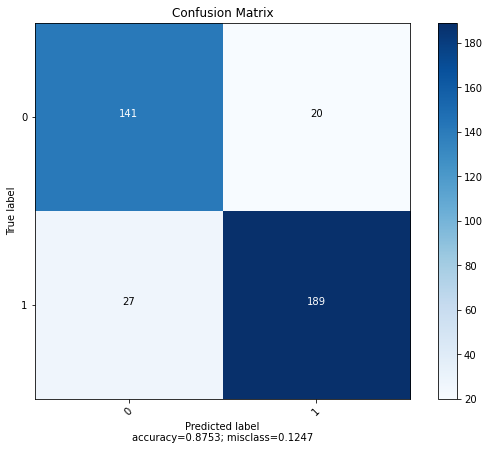

I type error is 0.053.
II type error is 0.072.


In [92]:
print_results(test_labels, test_labels_pred)

The result is telling us that we have 141+187 correct predictions and 29+20 incorrect predictions.

In [93]:
results(classifier, classifier_name,test_features,test_labels)

,accuracy,precision,recall,f1
Random Forest,0.875,0.904,0.875,0.889


We can see that in accuracy the Random Forest performs with 0.87 better than the Decision Tree, which achieves 0.82.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

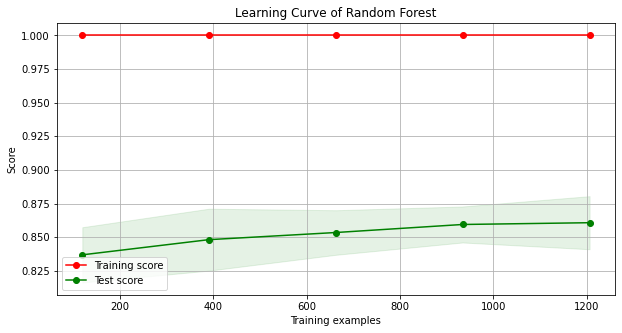

In [94]:
plot_learning_curve( rf_clf.best_estimator_, "Learning Curve of Random Forest", train_features, train_labels, cv=5)

It can be seen that the test score of the Random Forest is constant with the number of samples, thus the model is unable to learn from data. The train score is always 1 and shows that also the Random Forest overfits on the data.\
Random Forest reduces variance when compared to Decision Trees. 

In [95]:
plot_roc_curve(classifier, classifier_name, "ROC curve", test_features, test_labels)

The Random Forest provides global feature importance, i.e. an estimate of which features are important in the classification. The feature importances are obtained by computing it for all trees and taking the average. 

In [96]:
feature_importance = np.array(sorted(zip(X_df.drop(columns=['Cannabis']).columns,
                    rf_clf.best_estimator_.named_steps['clf'].feature_importances_), key=lambda x: x[1], reverse=True))

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance];

Variable: Nicotine             Importance: 0.12865718214369057
Variable: Legalh               Importance: 0.09700964167011475
Variable: Age                  Importance: 0.08059513350861228
Variable: Oscore               Importance: 0.07264304699580118
Variable: Ecstasy              Importance: 0.06914126992924188
Variable: Mushrooms            Importance: 0.06700555468363048
Variable: SS                   Importance: 0.06461970669565817
Variable: Cscore               Importance: 0.0607296473223326
Variable: Nscore               Importance: 0.0573514905867909
Variable: Escore               Importance: 0.05429379691069092
Variable: Ascore               Importance: 0.05064847008633546
Variable: Amphet               Importance: 0.043342633069370064
Variable: Impulsive            Importance: 0.037670890886917774
Variable: LSD                  Importance: 0.03561175250670527
Variable: Coke                 Importance: 0.030001426701733013
Variable: Benzos               Importance: 0.019819760

The most important feature for the Random Forest are the Nicotine, the Legal Highs and the Age. The most influent psycological factor is the Oscore.
In contrast with the features importance of the Decision Tree, here there are a lot of features that are relevant.\
Chocolate, Alcohol and Caffeine were not found as important as in the Decision Tree.

# 4.5 K-Nearest Neighbors

The K-Nearest Neighbors algorithm (KNN) is a non-parametric method, which considers the K closest training examples to the point of interest for predicting its class. This is done by a simple majority vote over the K closest points.


The hyperparameters of KNN include the following ones, which can be passed to the KNeighborsClassifier of sklearn.neighbors:
<ul>
<li>n_neighbors: corresponds to K, the number of nearest neighbors considered for the prediction (default=5)</li>
<li>weights:<ul><li>if uniform, then all neighbors have the same weight for the voting (default);</li>
<li>if distance, then the votes of the neighbors are weighted by the inverse of the distance for the voting</li></ul></li>
<li>p: the power parameter for the Minkowski metric (default=2)</li>
</ul>

In [97]:
knn_clf = gridsearch_cv(KNeighborsClassifier(),
                      KNN_PARAMS, train_features, train_labels, kf, smote=sm)
test_labels_pred = knn_clf.predict(test_features)

In [98]:
print("KNN: " + str(knn_clf.best_params_))

KNN: {'clf__n_neighbors': 45, 'clf__p': 1, 'clf__weights': 'distance'}


Now we evaluate our KNN model:

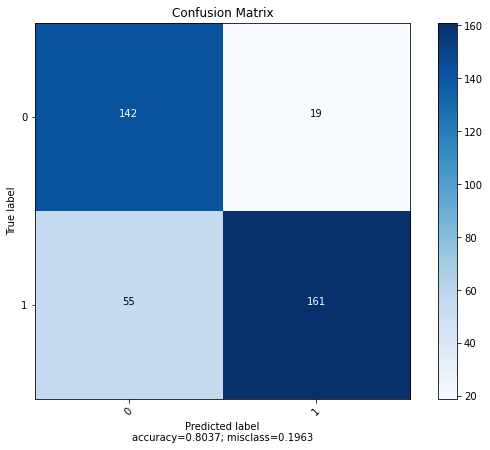

I type error is 0.050.
II type error is 0.146.


In [99]:
print_results(test_labels, test_labels_pred)

The II type error for the KNN model is the hishest th

In [100]:
classifier=[knn_clf]
classifier_name=['KNN']

In [101]:
results(classifier, classifier_name,test_features,test_labels)

,accuracy,precision,recall,f1
KNN,0.804,0.894,0.745,0.813


The accuracy is in this case worst than in the previous model.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

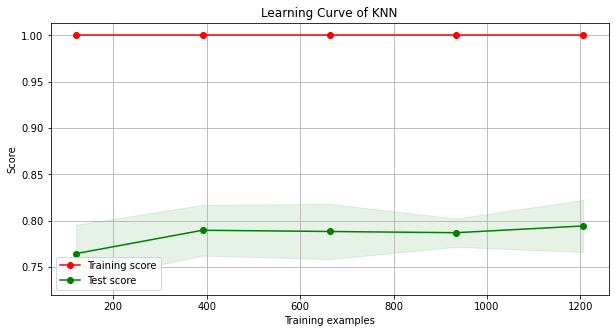

In [102]:
plot_learning_curve(knn_clf.best_estimator_,"Learning Curve of KNN",train_features, train_labels, cv=5)

This learning curve shows high test variability the model seems to converge on an f1 score of around 0.83. We can see that the training and test scores have not yet converged, so potentially this model would benefit from more training data.\
Finally, this model suffers primarily from error due to variance (the CV scores for the test data are more variable than for training data) so it is possible that the model is overfitting.

In [103]:
plot_roc_curve(classifier, classifier_name, "ROC curve", test_features, test_labels)

# 5 CONCLUSIONS

In [105]:
classifiers=[lr_clf, svm_clf, tree_clf, rf_clf, knn_clf]
classifier_names=['Logistic Regression', 'SVM', 'Decision Tree','Random Forest', 'KNN']

In [106]:
results(classifiers, classifier_names,test_features,test_labels)

,accuracy,precision,recall,f1
Logistic Regression,0.857,0.918,0.824,0.868
SVM,0.857,0.918,0.824,0.868
Decision Tree,0.814,0.858,0.810,0.833
Random Forest,0.875,0.904,0.875,0.889
KNN,0.804,0.894,0.745,0.813


We obtain good results at all but the KNN classifier is definitely the worst for each measure, except for the precision.\
Moreover, in accuracy the Random Forest performs with 0.87 better than the SVM, which achieves 0.86. But in the precision measure the SVM has the highest precision: it outperforms with 0.92 and the Random Forest with 0.90.
The Decision Tree even has the highest recall value, but it achieves worst results for the other scores.
The SVM and the Decision Tree have with 0.87 the second highest f1-score but is behind the f1-score of 0.88 of the Random Forest.

In [107]:
plot_roc_curve(classifiers, classifier_names, "ROC curve", test_features, test_labels)

The Random Forest classifier has with 0.935 the highest AUC value, followed by the SVM and the Logistic Regression with 0.933 and 0.929, respectively. The Decision Tree and the KNN perform worse with an AUC of just 0.881 and 0.87.

We have asked whether or not a psychological predisposition to drug consumption exists. Now, we can formulate the answer in brief:
<ul>
<li>There is a significant difference in the psychological profiles of cannabis users and non-users.</li>
<li>The psychological factors which involve a predisposition to using cannabis are the level of openness to experiences, the impulsiveness and the sensation seeking. The factor that is negative correlated with the use of cannabis is the conscientiousness. Our study demonstrates strong correlations between personality profiles and the risk of drug use.</li>
<li>We describe the groups of drugs which have correlated use: by the heatmap and the association rules we saw what are the different drugs which use is correlated with the use of cannabis.</li>
<li> Drug consumption risk analysis is done successfully with the two algorithms Support Vector Machine and Random forest. It was found that the best performance in accuracy, as well as f1-score and AUC is achieved by the Random Forest. One of the most important predictors for the Random Forest is the nicotine. This means that we have to pay attention to the people who smoke cigarettes, because it seems to be correlated with the use of cannabis. Others important features are the age and the level of openness to experiences.</li>
    </ul>
Concluding, we suggest to use the Random Forest model to identify potential cannabis users.